In [34]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
cc_df = pd.read_csv('Dataset/Credit_Card_Expenses.csv')

In [36]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
Month          20 non-null int64
CC_Expenses    20 non-null int64
dtypes: int64(2)
memory usage: 448.0 bytes


In [37]:
cc_df.head()

,Month,CC_Expenses
0,1,55
1,2,65
2,3,59
3,4,59
4,5,57


In [38]:
cc_df.describe()

,Month,CC_Expenses
count,20.00000,20.000000
mean,10.50000,59.200000
std,5.91608,3.105174
min,1.00000,53.000000
25%,5.75000,57.000000
50%,10.50000,59.000000
75%,15.25000,61.000000
max,20.00000,65.000000


In [39]:
cc_df['CC_Expenses'].mean()

59.2

In [40]:
cc_df.CC_Expenses.mean()

59.2

In [41]:
cc_df_expense = cc_df.CC_Expenses

In [42]:
print('Expense_ mean', cc_df_expense.mean())

Expense_ mean 59.2


In [43]:
print('Expense_median', cc_df_expense.median())

Expense_median 59.0


In [44]:
print('Expense_mode', cc_df_expense.mode())

Expense_mode 0    59
dtype: int64


In [45]:
print('Expense_min', cc_df_expense.min())

Expense_min 53


In [46]:
print('Expense_max', cc_df_expense.max())

Expense_max 65


In [47]:
print('Expense_range', cc_df_expense.())

SyntaxError: invalid syntax (<ipython-input-47-e22e90293403>, line 1)

In [48]:
 cc_df_expense.var()

9.642105263157891

In [49]:
cc_df_expense.std()

3.105173950547359

In [50]:
cc_df_expense.skew()

-0.09000332573429468

In [51]:
cc_df_expense.kurtosis()

-0.43669243979508465

In [52]:
cc_df_expense.quantile(.9)

63.0

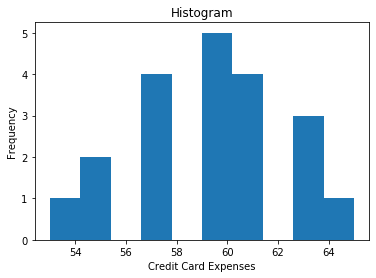

In [53]:
plt.hist(cc_df_expense)
plt.title('Histogram')
plt.xlabel('Credit Card Expenses')
plt.ylabel('Frequency')
plt.show()

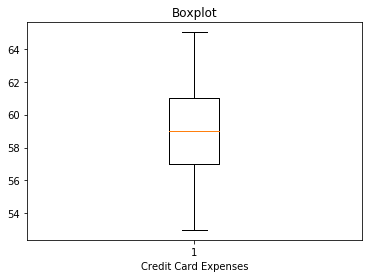

In [55]:
plt.boxplot(cc_df_expense)
plt.title('Boxplot')
plt.xlabel('Credit Card Expenses')
plt.show()

Question 2) : CC_Expense_excercise

In [169]:
cc_expense_new = pd.read_excel('Dataset/CC_Expenses_Exercise.xls')
cc_expense_20 = cc_expense_new.iloc[0:20,:]
cc_expense_20_df_excel = pd.DataFrame(cc_expense_20)
cc_expense_20_df.to_csv('Dataset/cc_expense_20_df.xls')

In [170]:
round(cc_expense_new.describe(),2)

,SL No.,Sex,Shopping,Banking,Credit_Card_usage
count,30.00,30.00,30.00,30.00,30.00
mean,15.50,1.50,1.43,1.70,66.00
std,8.80,0.51,0.50,0.47,42.96
min,1.00,1.00,1.00,1.00,20.00
25%,8.25,1.00,1.00,1.00,30.00
50%,15.50,1.50,1.00,2.00,55.00
75%,22.75,2.00,2.00,2.00,90.00
max,30.00,2.00,2.00,2.00,150.00


In [171]:
cc_expense_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
SL No.               30 non-null int64
Sex                  30 non-null int64
Shopping             30 non-null int64
Banking              30 non-null int64
Credit_Card_usage    30 non-null int64
dtypes: int64(5)
memory usage: 1.3 KB


In [172]:
cc_expense_new.head()

,SL No.,Sex,Shopping,Banking,Credit_Card_usage
0,1,1,1,1,140
1,2,2,2,2,20
2,3,2,1,2,30
3,4,2,1,2,30
4,5,1,1,1,130


In [173]:
cc_usage_mean = (cc_expense_new.groupby('Sex').Credit_Card_usage.mean())
gender = cc_usage_mean.index.values
gender
cc_usage = cc_usage_mean.values
cc_usage

array([93.33333333, 38.66666667])

In [174]:
cc_usage_df = pd.DataFrame({'Gender':['Male','Female'], 'CC_Usage':cc_usage})
cc_usage_df

,Gender,CC_Usage
0,Male,93.333333
1,Female,38.666667


In [175]:
cc_expense_new.head()

,SL No.,Sex,Shopping,Banking,Credit_Card_usage
0,1,1,1,1,140
1,2,2,2,2,20
2,3,2,1,2,30
3,4,2,1,2,30
4,5,1,1,1,130


In [176]:
cc_shopping = cc_expense_new.groupby('Shopping').Credit_Card_usage.mean()

In [177]:
cc_shopping_df = pd.DataFrame({'Shopping' : ['Yes','No'], 'Credit_Card_usage' : cc_shopping.values})
cc_shopping_df

,Shopping,Credit_Card_usage
0,Yes,80.588235
1,No,46.923077


In [178]:
cc_shopping = cc_expense_new.groupby('Banking').Credit_Card_usage.mean()
cc_shopping_df = pd.DataFrame({'Shopping' : ['Yes','No'], 'Credit_Card_usage' : cc_shopping.values})
cc_shopping_df

,Shopping,Credit_Card_usage
0,Yes,106.666667
1,No,48.571429


In [179]:
cc = cc_expense_new.Credit_Card_usage
cc_1 = cc.groupby([cc_expense_new.Sex,cc_expense_new.Shopping,cc_expense_new.Banking]).mean()
type(cc_1)

pandas.core.series.Series

In [180]:
cc_g = pd.DataFrame(cc_1)
cc_g.reset_index(inplace=True)
cc_g

,Sex,Shopping,Banking,Credit_Card_usage
0,1,1,1,130.000000
1,1,1,2,62.000000
2,1,2,1,70.000000
3,1,2,2,85.000000
4,2,1,1,40.000000
5,2,1,2,48.000000
6,2,2,2,33.333333


In [181]:
cc_g['Sex']=cc_g['Sex'].map({1:'Male',2:'Female'})
cc_g['Shopping']=cc_g['Shopping'].map({1:'Yes',2:'No'})
cc_g['Banking']=cc_g['Banking'].map({1:'Yes',2:'No'})

In [182]:
cc_g

,Sex,Shopping,Banking,Credit_Card_usage
0,Male,Yes,Yes,130.000000
1,Male,Yes,No,62.000000
2,Male,No,Yes,70.000000
3,Male,No,No,85.000000
4,Female,Yes,Yes,40.000000
5,Female,Yes,No,48.000000
6,Female,No,No,33.333333


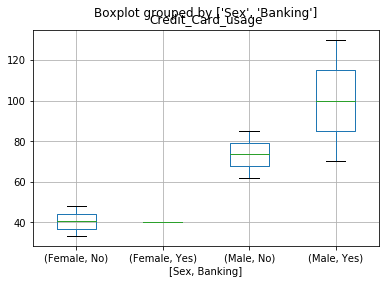

In [186]:
cc_g.boxplot(column = 'Credit_Card_usage',by=['Sex','Banking'])
plt.show()

In [187]:
cc_g.describe()

,Credit_Card_usage
count,7.000000
mean,66.904762
std,33.041340
min,33.333333
25%,44.000000
50%,62.000000
75%,77.500000
max,130.000000


Ques 3

In [209]:
Csat_Freq_df = pd.read_csv('Dataset/CSat_Freq_Table.csv')
col_name = Csat_Freq_df.columns
ques = col_name.values[1:]
ques

array(['q1', 'q2', 'q3', 'q4'], dtype=object)

In [210]:
Csat_Freq_df.q1.value_counts()

6    84
5    50
7    40
4     2
3     1
2     1
1     1
Name: q1, dtype: int64

In [253]:
df = pd.DataFrame()
for i in range(len(ques)):
    's'+str(i)= pd.Series(Csat_Freq_df[ques[i]].value_counts())
    df.add(s)
    print(s)
    print(df)

SyntaxError: can't assign to operator (<ipython-input-253-cacda31686b4>, line 3)

In [251]:
i =10
str(i)

'10'

In [238]:
df

""


In [239]:
df.add

<bound method _arith_method_FRAME.<locals>.f of Empty DataFrame
Columns: []
Index: []>

# DATA PREPROCESSING : MISSING VALUES REPLENISHMENT

In [1]:
import pandas as pd

In [2]:
telecom_df = pd.read_excel('Dataset/Missing_Values_Telecom.xlsx')

In [6]:
telecom_df_new = telecom_df.dropna()

In [7]:
telecom_df_new.to_excel('Dataset/Missing_Values_Telecom_Mod.xlsx')

In [8]:
telecom_df.count()

SL No.                 19
Current_Month_Usage    16
Last_3_Month_Usage     17
Average_Recharge       17
 Projected_Growth      19
Circle                 19
dtype: int64

In [9]:
telecom_df.head()

,SL No.,Current_Month_Usage,Last_3_Month_Usage,Average_Recharge,Projected_Growth,Circle
0,1,5.1,3.5,99.4,99.2,A
1,2,4.9,3.0,98.6,99.2,A
2,3,NaN,3.2,NaN,99.2,A
3,4,4.6,3.1,98.5,92.0,A
4,5,5.0,NaN,98.4,99.2,A


In [13]:
cmu = telecom_df.Current_Month_Usage
cmu_mean = telecom_df.Current_Month_Usage.mean()
lmu = telecom_df.Last_3_Month_Usage
lmu_median = telecom_df.Last_3_Month_Usage.median()
avg_recharge = telecom_df.Average_Recharge
cmu.fillna(cmu_mean,inplace=True)

In [14]:
lmu.fillna(lmu_median,inplace=True)
avg_recharge.fillna(100,inplace=True)

In [15]:
telecom_df['Current_Month_Usage'] = cmu

In [16]:
telecom_df['Last_3_Month_Usage'] = lmu

In [17]:
telecom_df['Average_Recharge'] = avg_recharge

In [19]:
telecom_df.count()

SL No.                 19
Current_Month_Usage    19
Last_3_Month_Usage     19
Average_Recharge       19
 Projected_Growth      19
Circle                 19
dtype: int64

In [21]:
myProfile = pd.read_excel('Dataset/CC_Profile.xlsx')
myProfile.head()

,ID,Sex,Shopping,Banking
0,1,1,1,1
1,2,2,2,2
2,3,2,1,2
3,4,2,1,2
4,5,1,1,1


In [22]:
myusage = pd.read_csv('Dataset/CC_Usage.txt',delimiter='\t')
myusage.head()

,ID,Credit Card usage
0,1,140
1,2,20
2,3,30
3,4,30
4,5,130


In [25]:
pd.merge(myProfile,myusage,on='ID').head()

,ID,Sex,Shopping,Banking,Credit Card usage
0,1,1,1,1,140
1,2,2,2,2,20
2,3,2,1,2,30
3,4,2,1,2,30
4,5,1,1,1,130


In [40]:
class_1 = pd.read_csv('Dataset/Classification2.txt',delimiter='\t')
class_1.head()

,SLNo,District,House_Type,Income,Previous_Customer,Outcome
0,11,Suburban,Terrace,Low,Yes,Responded
1,12,Rural,Terrace,High,Yes,Responded
2,13,Rural,Detached,Low,No,Responded
3,14,Urban,Terrace,High,Yes,No Response


In [46]:
class_2 = pd.read_excel('Dataset/Classification1.xlsx')
class_2.head()

,SLNo,District,House_Type,Income,Previous_Customer,Outcome_1
0,1,Suburban,Detached,High,No,No Response
1,2,Suburban,Detached,High,Yes,No Response
2,3,Rural,Detached,High,No,Responded
3,4,Urban,Semi-detached,High,No,Responded
4,5,Urban,Semi-detached,Low,No,Responded


In [47]:
class_2.append(class_1)

C:\Users\apraj\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,District,House_Type,Income,Outcome,Outcome_1,Previous_Customer,SLNo
0,Suburban,Detached,High,NaN,No Response,No,1
1,Suburban,Detached,High,NaN,No Response,Yes,2
2,Rural,Detached,High,NaN,Responded,No,3
3,Urban,Semi-detached,High,NaN,Responded,No,4
4,Urban,Semi-detached,Low,NaN,Responded,No,5
5,Urban,Semi-detached,Low,NaN,No Response,Yes,6
6,Rural,Semi-detached,Low,NaN,Responded,Yes,7
7,Suburban,Terrace,High,NaN,No Response,No,8
8,Suburban,Semi-detached,Low,NaN,Responded,No,9
9,Urban,Terrace,Low,NaN,Responded,No,10



# TRANSFORMATION / NORMALIZATION

In [48]:
from sklearn.preprocessing import StandardScaler as sc
from sklearn.preprocessing import MinMaxScaler as mms

In [49]:
logistic_df = pd.read_excel('Dataset/Logistic.xlsx')

In [50]:
logistic_df.head()

,Ind_Exp_Act_Score,Tran_Speed_Score,Peer_Comb_Score
0,6.2,9.3,7.4
1,2.6,2.2,8.7
2,9.5,1.5,8.2
3,2.6,5.0,0.4
4,10.0,7.7,7.2


In [65]:
std_scale = sc().fit(logistic_df)
std_mydata =std_scale.transform(logistic_df)
std_mydata_df = pd.DataFrame(std_mydata)
std_mydata_df.to_excel('Dataset/std_mydata_df.xls')

In [69]:
sc.transform?

In [ ]:
std_scale = sc().fit(logistic_df)
std_mydata =std_scale.transform(logistic_df)
std_mydata_df = pd.DataFrame(std_mydata)
std_mydata_df.to_excel('Dataset/std_mydata_df.xls')

In [75]:
sc().fit_transform(logistic_df).mean()

1.4742553361008882e-16

In [71]:
min_max_scaled_data = mms().fit_transform(logistic_df)

In [76]:
mms_df = pd.DataFrame(min_max_scaled_data)

In [77]:
mms_df.describe()

,0,1,2
count,980.000000,980.000000,980.000000
mean,0.504286,0.503602,0.494000
std,0.286509,0.292462,0.289348
min,0.000000,0.000000,0.000000
25%,0.260000,0.240000,0.250000
50%,0.510000,0.510000,0.490000
75%,0.750000,0.750000,0.740000
max,1.000000,1.000000,1.000000
